In [62]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.datasets import load_iris 
from sklearn.metrics import accuracy_score, precision_score, log_loss

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
data = load_iris()
X = data['data']
y = data['target']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [35]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [38]:
round(accuracy_score(y_test, y_pred), 2)

0.98

### Logistic regression

In [43]:
df = pd.read_csv('data/train_mobile.xls', sep=';')

In [44]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,1
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


<AxesSubplot:>

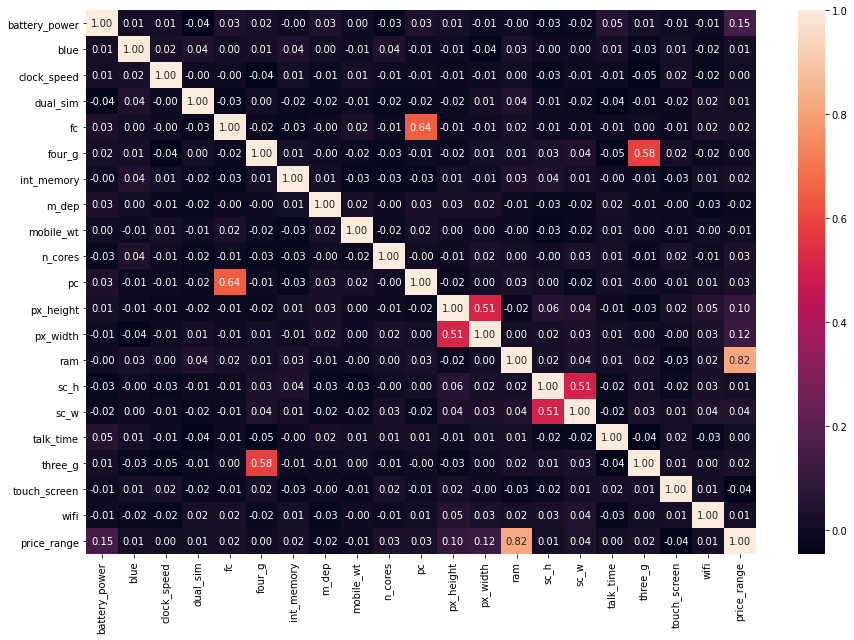

In [50]:
fig = plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [51]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [52]:
# the max correlation have the following features:
features = ['battery_power', 'px_height', 'px_width', 'ram', 'touch_screen']

In [54]:
df[features].values

array([[ 842,   20,  756, 2549,    0],
       [1021,  905, 1988, 2631,    1],
       [ 563, 1263, 1716, 2603,    1],
       ...,
       [1911,  868, 1632, 3057,    1],
       [1512,  336,  670,  869,    1],
       [ 510,  483,  754, 3919,    1]], dtype=int64)

In [55]:
X = df[features].values
y = df['price_range'].values

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [57]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

In [61]:
print(f'The precision score is equal to {round(precision_score(y_test, y_pred), 4)}.')

The precision score is equal to 0.9859.


In [65]:
round(log_loss([0, 0, 1, 1], [0.2, 0.8, 1, 0.6], normalize=False), 2)

2.34

In [69]:
log_loss([[0, 0, 1], [0, 0, 1], [1, 0, 0]], [[0.2, 0.3, 0.5], [0, 0, 1], [0.1, 0, 0.9]])

0.998577424517998

In [68]:
def mult_logloss(y_true, y_pred):
    n, m = y_true.shape[0], y_true.shape[1]
    sum_ = []
    for i in range(n):
        for j in range(m):
            if y_true[i][j] != 0 and y_pred[i][j] != 0:
                sum_.append(y_true[i][j] * np.log(y_pred[i][j]))
    sum_ = np.nansum(sum_)
    loss = -(sum_ / n)
    return loss

y_pred = np.array([[0.2, 0.3, 0.5], [0, 0, 1], [0.1, 0, 0.9]])
y_true = np.array([[0, 0, 1], [0, 0, 1], [1, 0, 0]])
np.round(mult_logloss(y_true, y_pred),2)

1.0